# Analyse der HANA - SSBM Benchmark Log Dateien

## Einstellungen

Bitte passen sie die Einstellungen bei Bedarf an.

In [44]:
from util import Analyser
LOG_PATH="../../../ssbm/i7-6core.log"
analyser = Analyser(LOG_PATH)

## Allgemein:
Im folgenden wird die allgemeine Laufzeit des Benchmarks analysiert
mit folgenden Testspezifikationen

Wiederholungen:

In [45]:
print(analyser.get_repetitions())

250


CPU: Intel i7 4.2ghz

CPU Kerne: 6

RAM: 8GB

### Zeilenbasiert
Im folgenden wird die allgemeine Laufzeit des Benchmarks
bei einem zeilenbasierten Schmata betrachted.

In [46]:
benchmark = analyser.get_row_benchmark()
benchmark.print_stats()

Samples,250
Average,3539840
Min,3353808
Max,4283873
Median,3519021
Standard Deviation,110172
Total,884960100


## Spaltenbasiert
Im folgenden wird die allgemeine Laufzeit des Benchmarks bei einem
spaltenbasierten Schemata betrachtet

In [47]:
benchmark = analyser.get_column_benchmark()
benchmark.print_stats()

Samples,250
Average,753846
Min,725573
Max,852537
Median,750227
Standard Deviation,17032
Total,188461397


### Vergleich Zeilenbasiert vs. Spaltenbasiert

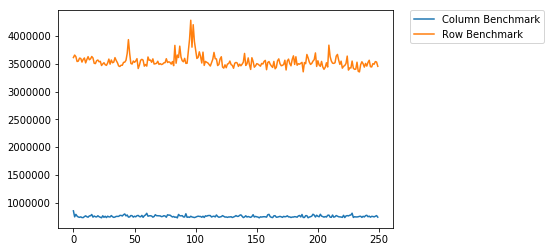

In [48]:
from util import Comparison

column_benchmark = analyser.get_column_benchmark()
row_benchmark = analyser.get_row_benchmark()
comparison = Comparison(column_benchmark, row_benchmark)

comparison.compare_visually()

### Stabilität des Benchmarks

#### Spaltenbasiert

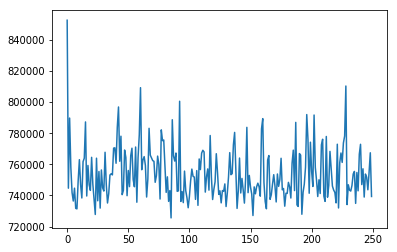

In [49]:
from matplotlib import pyplot as plt, mlab

benchmark = analyser.get_column_benchmark()
plt.plot(benchmark.get_times())
plt.show()

#### Zeilenbasiert

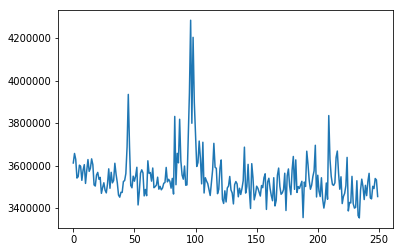

In [50]:
benchmark = analyser.get_row_benchmark()
plt.plot(benchmark.get_times())
plt.show()

## Betrachtung einzelner Queries
Im folgenden werden die einzelnen Queries des SSBM Benchmarks betrachted.

### Spaltenbasiert

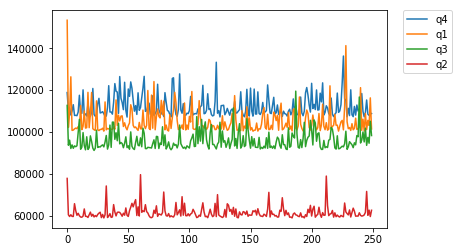

In [51]:
from util import display_table
import re

benchmark = analyser.get_column_benchmark()

query_stats = benchmark.get_query_stats(lambda x: not re.search("\\.", x))
comparison = Comparison(*query_stats)
comparison.compare_visually()

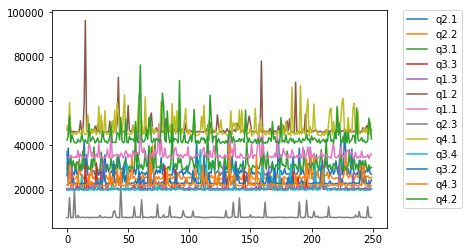

In [52]:
query_stats = benchmark.get_query_stats()
comparison = Comparison(*query_stats)
comparison.compare_visually()

## Zeilenbasiert

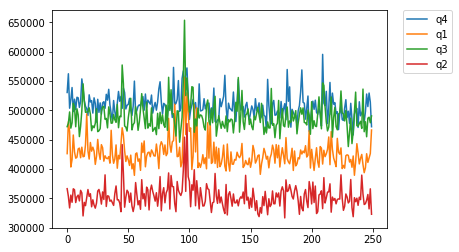

In [53]:
benchmark = analyser.get_row_benchmark()
query_stats = benchmark.get_query_stats(lambda x: not re.search("\\.", x))
comparison = Comparison(*query_stats)
comparison.compare_visually()

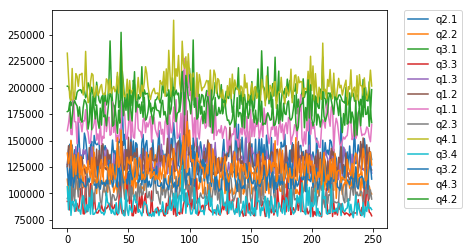

In [54]:
query_stats = benchmark.get_query_stats()
comparison = Comparison(*query_stats)
comparison.compare_visually()

## Indizes
### Spaltenbasiert

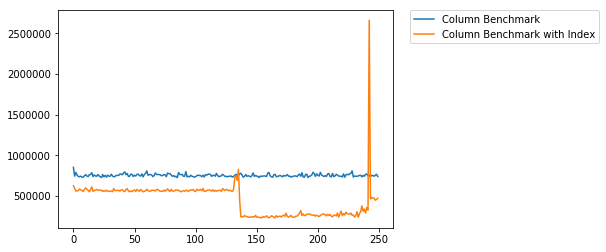

In [55]:
column_benchmark = analyser.get_column_benchmark()
index_column_benchmark = analyser.get_column_benchmark_I()
comparison = Comparison(column_benchmark, index_column_benchmark)

comparison.compare_visually()

### Zeilenbasiert

In [56]:
row_benchmark = analyser.get_row_benchmark()
index_row_benchmark = analyser.get_row_benchmark_I()
comparison = Comparison(row_benchmark, index_row_benchmark)

comparison.compare_visually()

KeyError: 'row_benchmark_index'